# Unifor
## MBA - Ciência de Dados - Turma 5
### Aluno: Ticiano Andrade Damasceno

## Grafo

# Importando bibliotecas

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

pd.set_option('display.min_rows',60)

%matplotlib inline

# Baixando e tratando os dados

In [2]:
padrao = re.compile(r'txt')
texto = []
for p in os.listdir(path='./genius'):
    if not re.search(padrao,p):
        for txt in os.listdir(path=f'./genius/{p}'):
            if re.search(padrao,txt):
                with open(f'./genius/{p}/{txt}', 'r', encoding = 'utf-8') as ep:
                    for ln in ep.read().split('\n'):
                        texto.append(ln)

In [3]:
len(texto)

68166

In [4]:
# Criando o DF
df = pd.DataFrame(texto, columns=['texto'])
# Limpando linhas vazias
df.dropna(inplace=True)
df.drop(df[df['texto']==''].index, inplace=True)
df.reset_index(drop=True, inplace=True)
# Criando a coluna para identificar as conversas
df['conversa'] = df['texto'].apply(lambda x: 0 if ':' not in x or 'CUT TO:' in x or 'EXT:' in x or 'INT:' in x or 'INT.' in x else 1)


In [112]:
df

,texto,conversa,cena,personagem,personagem_padronizado
0,EPISODE 1 - WINTER IS COMING,0,1,None,None
1,[First scene opens with three Rangers riding t...,0,2,None,None
2,WAYMAR ROYCE: What d’you expect? They’re savag...,1,2,WAYMAR ROYCE,WAYMAR ROYCE
3,WILL: I’ve never seen wildlings do a thing lik...,1,2,WILL,WILL
4,WAYMAR ROYCE: How close did you get?,1,2,WAYMAR ROYCE,WAYMAR ROYCE
5,WILL: Close as any man would.,1,2,WILL,WILL
6,GARED: We should head back to the wall.,1,2,GARED,GARED
7,ROYCE: Do the dead frighten you?,1,2,ROYCE,ROYCE
8,GARED: Our orders were to track the wildlings....,1,2,GARED,GARED
9,ROYCE: You don’t think he’ll ask us how they d...,1,2,ROYCE,ROYCE


In [5]:
# Criando a coluna para identificar cada cena
c=0
cenas = []
for i in range(len(df)):
    c += 1 if df.iloc[i,1] == 0 else 0
    cenas.append(c)

df['cena'] = cenas

In [6]:
# Separando o nome dos personagens
df['personagem'] = df[df['conversa']==1]['texto'].str.split(':')
df['personagem'] = df['personagem'].apply(lambda x: x[0].upper() if type(x) == type(list()) else None)

In [7]:
len(df)

35884

## Tratando o De-Para

In [8]:
depara = {
    "TYRION": "TYRION LANNISTER",
    "JON": "JON SNOW",
    "JAIME": "JAIME LANNISTER",
    "CERSEI": "CERSEI LANNISTER",
    "DAENERYS": "DAENERYS TARGARYEN",
    "BRONN": "BRONN",
    "SAM": "SAMWELL TARLY",
    "SANSA": "SANSA STARK",
    "YGRITTE": "YGRITTE",
    "ARYA": "ARYA STARK",
    "THEON": "THEON GREYJOY",
    "VARYS": "VARYS",
    "ROBB": "ROBB STARK",
    "Joffrey" : 'JOFFREY BARATHEON',
    "BRINENNE": 'Brienne de Tarth',
    "BRIENNE": "BRIENNE DE TARTH",
    "JOFFREY": 'JOFFREY BARATHEON',
    "BRAN": 'BRAN STARK',
    "OLENNA": "OLLENA TYRELL",
    "CATELYN": "CATELYN STARK",
    "MARGAERY": "Margaery Tyrell",
    "TYWIN": "Tywin Lannister",
    "STANNIS": 'Stannis Baratheon',
    "DAVOS": 'Davos Seaworth',
    "AEMON": "Meistre Aemon",
    "AERON": "Aeron Greyjoy",
    "AERSON": "Aeron Greyjoy",
    "ALLISER": "Alliser Thorne",
    "ALLISER THORN": "Alliser Thorne",
    "ALLISER THORNE":"Alliser Thorne",
    "ALLISER THORNE": "Alliser Thorne",
    "ALLISER THRONE": "Alliser Thorne",
    "ALLISTER": "Alliser Thorne",
    "ALTON": "Alton Lannister",
    "AMORY": "Amory Lorch",
    "AHSA": "Asha Greyjoy",
    "ANGUY ": "ANGUY",
    "ANGUY": 'ANGUY',
    "ARAY":"ARYA STARK",
    "AREO": "Areo Hotah",
    "ARTHUR": "Arthur Dayne",
    "AYRA": "ARYA STARK",
    "BAELISH": "LITTLEFINGER",
    "BALON": "Balon Greyjoy",
    "BALON DWARF": "Balon Greyjoy",
    "BARRISTAN": "BARRISTAN SELMY",
    "BARRISTON": "BARRISTAN SELMY",
    "BELICHO": "Belicho Paenymion",
    "BRAN": "BRAN STARK",
    "BENJEN": 'BENJEN STARK',
    "BERIC": 'Beric Dondarrion',
    "BRAND": "BRAN STARK",
    "BRANN STARK": "BRAN STARK",
    "BRON": 'BRONN',
    "BRYNDEN":"Brynden Tully",
    "BUER": 'BUYER',
    "CASSEL": "Rodrik Cassel",
    "CATELYIN": 'Catelyn Stark',
    "CATELYN": 'Catelyn Stark',
    "CATELYN STARK" : 'Catelyn Stark',
    "CATELYN" : "Catelyn Stark",
    "CERSEI BARATHEON": "CERSEI LANNISTER",
    "CERSEI LANNISTER": "CERSEI LANNISTER",
    "CERSEL": "CERSEI LANNISTER",
    "CERSIE": "CERSEI LANNISTER",
    "CESEI": "CERSEI LANNISTER",
    "BLACKSMITH"  : 'Gendry Baratheon',
    "BLACKFISH" : "Brynden Tully",
    "COLEN": "Colen of Greenpools",
    "CRESSEN": "Maester Cressen",
    "DAAERIO": 'Daario Naharis',
    "DAARIO": 'Daario Naharis',
    "DAENARYS STORMBORN" : "Daenerys Targaryen",
    "DAENERYS STORMBORN" : "Daenerys Targaryen",
    "DAENERYS TARGARYEN" : "Daenerys Targaryen",
    "DAERNEYS": "Daenerys Targaryen",
    "DAEYNERYS" : "Daenerys Targaryen",
    "DAGMER" : 'Dagmer Cleftjaw',
    "DANAERYS" : "Daenerys Targaryen",
    "DANERYS" : "Daenerys Targaryen",
    "DANY" : "Daenerys Targaryen",
    "DARIO" : 'Daario Naharis',
    "DARRIO" : 'Daario Naharis',
    "DAV OS" : 'Davos Seaworth',
    "DAVOS" : "Davos Seaworth",
    "DEANERYS TARGARIAN" : "Daenerys Targaryen",
    "DENERYS": "Daenerys Targaryen",
    "DERRYK" : "Derrick Darry",
    "DICKON" : "Dickon Tarly",
    "DOLOROUD EDD" : "Eddison Tollett",
    "DOLOROUS EDD" : "Eddison Tollett",
    "DOLROUS EDD" : "Eddison Tollett",
    "ED" : "EDDARD STARK",
    "EDD" : "EDDARD STARK",
    "EDDARD STARK" : 'EDDARD STARK',
    "EDDARK STARK" : 'EDDARD STARK',
    "EDDISION" : "Eddison Tollett",
    "EDDISON" :  "Eddison Tollett",
    "EDMURE" : "EDMURE TULLY",
    "ELARIA" : 'ELLARIA SAND',
    "ELLARIA" : 'ELLARIA SAND',
    "ELLIA" : 'ELIA MARTELL',
    "ERSEI" : "CERSEI LANNISTER",
    "EURION" : "Euron Greyjoy",
    "EURON" : "Euron Greyjoy",
    "GENDRY" : "	GENDRY BARATHEON",
    "GRAND MAESTER PYCELLE" : "Grande Meistre Pycelle",
    "GRAND MAESTER PYRCELLE" : "Grande Meistre Pycelle",
    "GREYWORM" : 'GREY WORM',
    "HIZDAHR" : "HIZDAHR ZO LORAQ",
    "ILLYRIO" : "Illyrio Mopatis",
    "ILLYRIO MOPATIS" : 'Illyrio Mopatis',
    "INNKEEPER" : 'Masha Heddle',
    "JAMIE LANNISTER" : "JAIME LANNISTER",
    "JANOS" : 'JANOS SLYNT',
    "JANOS SLUNT" : 'JANOS SLYNT',
    "JEOR" : "JEOR MORMONT",
    "JOFFFREY" : 'JOFFREY BARATHEON',
    "JOHN" : "JON SNOW",
    "JOJEN" : 'Jojen Reed',
    "JORA" : "JORAH MORMONT",
    "JORAH" : "JORAH MORMONT",
    "KARL" : 'KARL TANNER',
    "KARSTARK" : 'Harald Karstark',
    "KEVAN" : 'KEVAN LANNISTER',
    "KING JOFFREY" : 'JOFFREY BARATHEON',
    'KRAZNYS' : 'KRAZNYS MO NAKLOZ',
    "LADY ANYA" : 'Anya Waynwood',
    "LADY OLENNA" : 'Olenna Tyrell',
    "LADY WALDA" : 'Walda Gorda Frey',
    "LADYC RANE" : 'LADY CRANE',
    "LANCEL" : 'LANCEL LANNISTER',
    "LOLLYS" : 'LOLLYS STOKEWORTH',
    "LOMMY" : 'LOMMY GREENHANDS',
    "LORAS" : '	LORAS TYRELL',
    "LYANNA" : 'LYANNA MORMONT',
    "LYSA" : 'LYSA ARRYN',
    "MACE" : 'MACE TYRELL',
    "MAESTER PYCELL" : "Grande Meistre Pycelle",
    "MAESTER PYCELLE" : "Grande Meistre Pycelle",
    "MARTYN" : 'Martyn Lannister',
    "MARYN TRANT" : 'MERYN TRANT',
    "MERYN" : 'MERYN TRANT',
    "MEERA" : 'MEERA REED',
    "MEISTRE AEMON" : 'MAESTER AEMON',
    "MELISDANDRE" : 'MELISANDRE',
    "MERYN" : 'MERYB TRANT',
    "MHAEGAN" : 'MHAEGEN',
    "MOSADOR" : 'MOSSADOR',
    "MOUNTAIN" : "Gregor Clegane",
    "MOUNTIAN" : "Gregor Clegane",
    "MYRCELLA" : 'MYRCELLA BARATHEON',
    "NED" : 'Eddard Stark',
    "NED STARK" : 'Eddard Stark',
    "OLEANNA" : 'Olenna Tyrell',
    "OLLENA TYRELL" : 'Olenna Tyrell',
    "OTHELL YARWICK" : "OTHELL YARWYCK",
    "PETYR" : 'LITTLEFINGER',
    "PETYR BAELISH" : 'LITTLEFINGER',
    "PYATT PREE" : 'PYAT PREE',
    "PYATTPREE" : 'PYAT PREE',
    "PYCELL" : "Grande Meistre Pycelle",
    "PYCELLE" : "Grande Meistre Pycelle",
    "PYELLE" : "Grande Meistre Pycelle",
    "PYP" : "PYPAR",
    "RAMSAY" : 'RAMSAY BOLTON',
    "RAMSEY" : 'RAMSAY BOLTON',
    "RENLY" : "RENLY BARATHEON",
    "RICKON" : 'RICKON STARK',
    "RHAKARO" : 'RAKHARO',
    "RHAKHARO" : 'RAKHARO',
    "RICKARD" : "RICKARD KARSTARK",
    "RIKON" : 'RICKON STARK',
    "ROBERT" : 'ROBERT BARATHEON',
    "ROBETT" : 'ROBETT GLOVER',
    "ROBIN" : "ROBIN ARRYN",
    "RODRICK CASSEL" : 'RODRIK CASSEL',
    "RODRIK CASSAL" : 'RODRIK CASSEL',
    "RODRIK" : 'RODRIK CASSEL',
    "ROOSE" : 'ROOSE BOLTON',
    "SAAN" : "Salladhor Saan",
    "SALLADHOR" : "Salladhor Saan",
    "SALLADOR" : "Salladhor Saan",
    "SAMMY" : "SAMWELL TARLY",
    "SAMWEL TARLY" : "SAMWELL TARLY",
    "SAMWELL" : "SAMWELL TARLY",
    "SANDOR" : "SANDOR CLEGANE",
    "SER JORAH" : 'Jorah Mormont',
    "SER ALLISER" : 'Alliser Thorne',
    "SER BARRISTAN" : "Barristan Selmy",
    "SER DONTOS" : 'Dontos Hollard',
    "SER RODRIK" : "Rodrik Cassel",
    "SER VARDIS" : 'Vardis Egen',
    "TYRIOM" : 'TYRION LANNISTER',
    "TYRON" :  'TYRION LANNISTER',
    "TYWEN" : 'TYWIN LANNISTER',
    "TWYIN" : 'TYWIN LANNISTER',
    "VISERYS" : 'VISERYS TARGARYEN', 
    "WALDERY FREY" : 'Walder Frey',
    "WALDER FREY" : 'Walder Frey',
}

In [9]:
def upper_dict(dic):
    resultado = {}
    for chave, valor in dic.items():
        upper_chave = chave.upper()
        upper_valor = valor.upper()
        resultado[upper_chave] = upper_valor
    return resultado

Udepara = upper_dict(depara)

In [10]:
df['personagem_padronizado'] = [Udepara[x] if x in Udepara else x for x in df['personagem']]

# Visualizando os dados e tratando os dados

In [11]:
total = df['personagem_padronizado'].value_counts()
lista_personagem = [i.upper() for i in total.index]
indice = [i+1 for i in range(len(total))]
cod_personagem = {i:j.upper() for i,j in enumerate(total.index)}
cod_frequencia = {i:j for i,j in enumerate(total.values)}

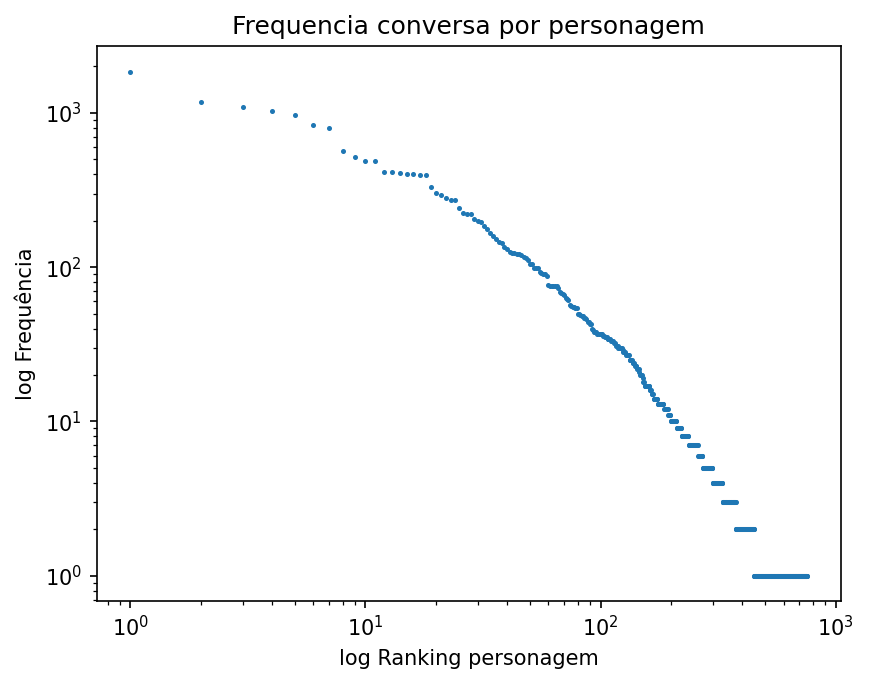

In [12]:
plt.figure(dpi=150)
plt.scatter(x=indice, y=df['personagem_padronizado'].value_counts(), s=2)
plt.title('Frequencia conversa por personagem')
plt.xlabel('log Ranking personagem')
plt.ylabel('log Frequência')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [13]:
total_acumulado = []
for i in range(len(total)) :
    if i == 0:
        total_acumulado.append(total[i])
    else:
        total_acumulado.append(total_acumulado[i-1] + total[i])

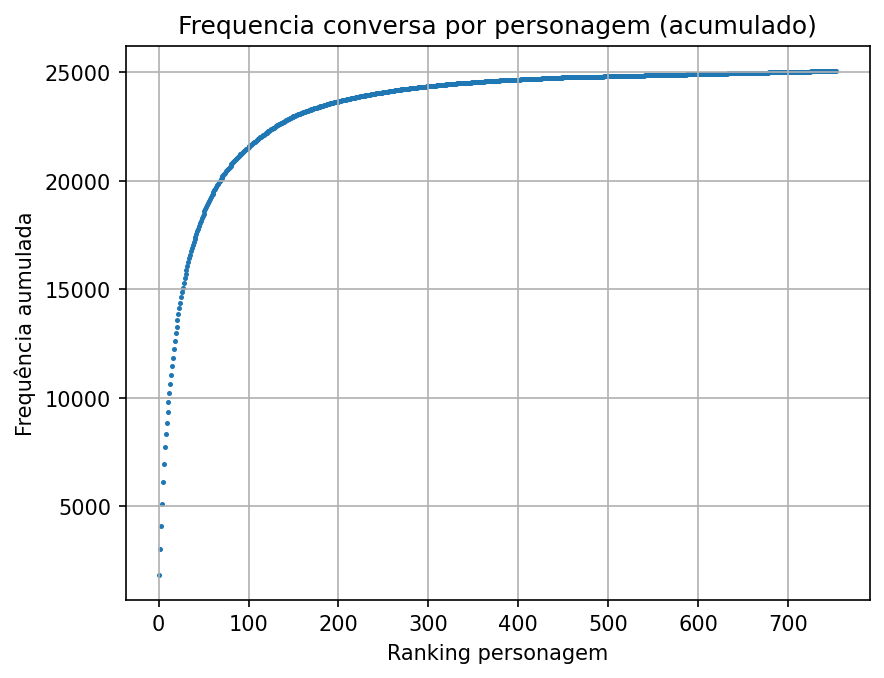

In [14]:
plt.figure(dpi=150)
plt.scatter(x=indice, y=total_acumulado, s=2)
plt.title('Frequencia conversa por personagem (acumulado)')
plt.xlabel('Ranking personagem')
plt.ylabel('Frequência aumulada')
plt.grid()
plt.show()

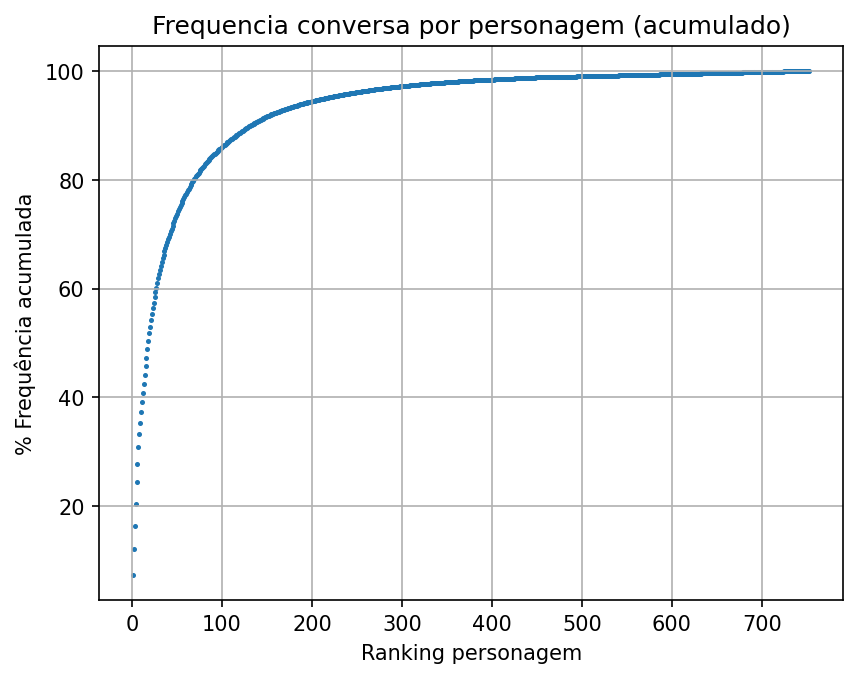

In [15]:
media_total_acumulado = [(i/total_acumulado[-1])*100 for i in total_acumulado ]
plt.figure(dpi=150)
plt.scatter(x=indice, y=media_total_acumulado, s=2)
plt.title('Frequencia conversa por personagem (acumulado)')
plt.xlabel('Ranking personagem')
plt.ylabel('% Frequência acumulada')
plt.grid()
plt.show()

In [16]:
corte = 95 # porcentagem
quantidade = len([i for i in media_total_acumulado if i < corte])

lista_personagem_mais_frequentes = list(total.index)[:quantidade]
len(lista_personagem_mais_frequentes)

215

In [17]:
#regex
padrao = re.compile(r'\([^)]*\)')
#removendo parênteses
result = [re.sub(padrao,'',i).strip() for i in lista_personagem_mais_frequentes]

result2 = [Udepara[i] if i in Udepara else i for i in result]
result2 = set(result2)
lista_personagem_tratado = list(result2)
#removendo linhas com parênteses e ponto
remover = ['\t', '.','[',']', 'SOLDIER', 'BOY','GIRL','MAN', 'ALL', 'GUARD', 'CUT', 'EXT', 'INT', '0','1','2','3','4','5']
lista_personagem_final = [i.upper() for i in lista_personagem_tratado if not any(c in i for c in remover)]

print(len(lista_personagem_final))

187


In [18]:
lista_personagem_final

['HIZDAHR ZO LORAQ',
 'RAMSAY BOLTON',
 'VARYS',
 'JAIME LANNISTER',
 'DAVOS SEAWORTH',
 'YOREN',
 'RORGE',
 'MATTHOS',
 'DAARIO NAHARIS',
 'GENDRY BARATHEON',
 'MERYB TRANT',
 'WINE MERCHANT',
 'BRIENNE DE TARTH',
 'LORD OF BONES',
 'RAKHARO',
 'RADZAL MO ERAZ',
 'POLLIVER',
 'THE HOUND',
 'IZEMBARO',
 'SYRIO FOREL',
 'RANDYLL',
 'BOBONO',
 'GREATJON UMBER',
 'BALON GREYJOY',
 'JEOR MORMONT',
 'ROS',
 'ORELL',
 'MERYN TRANT',
 'IRRI',
 'SAMWELL TARLY',
 'LOCKE',
 'KHAL DROGO',
 'RIDER',
 'VIOLET',
 'LITTLEFINGER',
 'HODOR',
 'RODRIK CASSEL',
 'LUWIN',
 "MOLE'S TOWN WHORE",
 'TORTURER',
 'TALISA',
 'SELYSE',
 'NYMERIA',
 'LOBODA',
 'RENLY BARATHEON',
 'CERSEI LANNISTER',
 'ARYA STARK',
 'SANDOR CLEGANE',
 'TORMUND',
 'LADY CRANE',
 'DONTOS HOLLARD',
 'CRASTER',
 'THOROS',
 'MARILLION',
 'KEVAN LANNISTER',
 'STANNIS BARATHEON',
 'WALDER',
 'GRENN',
 'ELLARIA SAND',
 'JORAH MORMONT',
 'KHAL MORO',
 'XARO',
 'QOTHO',
 'MEN',
 'TYRION LANNISTER',
 'RAST',
 'MARGAERY TYRELL',
 'JAQEN',
 'RO

# Início da criação dos grafos

## Parte inicial e que não muda

In [19]:
len(df[df['personagem_padronizado'] == 'AERON GREYJOY'])

10

In [20]:
import networkx as nx
lista_personagem_final.sort()
index_personagens = [x for x in range(len(lista_personagem_final))]
def recarregar_grafo():
    G = nx.Graph(nome = 'Grafo Game of Thrones')
    G.add_nodes_from(index_personagens)
   
    # criando atributos para cada personagem
    # fala = conta +1 toda vez que o personagem realizou um fala
    # ouviu = conta +1 toda vez que uma fala foi realizada numa cena em que o personagem estava
    # citado = conta +1 toda vez que o personagem for citado em uma fala
    for x in range(len(G)):
        G.nodes[x]['nome'] = lista_personagem_final[x]

    for _,x in G.nodes.data():        
        x['fala'] = len(df[df['personagem_padronizado'] == x['nome']])
        # G.nodes[x]['ouviu'] = 0
        # G.nodes[x]['citado'] = 0 

    return G

In [21]:
G = recarregar_grafo()

In [22]:
len(index_personagens)

187

In [23]:
print(G)

Graph with 187 nodes and 0 edges


In [24]:
print(G.nodes.data())

[(0, {'nome': 'AERON GREYJOY', 'fala': 10}), (1, {'nome': 'ALTON LANNISTER', 'fala': 34}), (2, {'nome': 'AMORY LORCH', 'fala': 14}), (3, {'nome': 'ANGUY', 'fala': 30}), (4, {'nome': 'ANYA WAYNWOOD', 'fala': 14}), (5, {'nome': 'ARYA STARK', 'fala': 803}), (6, {'nome': 'BALON GREYJOY', 'fala': 48}), (7, {'nome': 'BARRISTAN SELMY', 'fala': 105}), (8, {'nome': 'BENJEN STARK', 'fala': 37}), (9, {'nome': 'BERIC DONDARRION', 'fala': 105}), (10, {'nome': 'BLACK LORREN', 'fala': 10}), (11, {'nome': 'BLACK WALDER', 'fala': 17}), (12, {'nome': 'BOBONO', 'fala': 14}), (13, {'nome': 'BRAN STARK', 'fala': 408}), (14, {'nome': 'BRIENNE DE TARTH', 'fala': 399}), (15, {'nome': 'BRONN', 'fala': 402}), (16, {'nome': 'BRYNDEN TULLY', 'fala': 55}), (17, {'nome': 'CAMELLO', 'fala': 17}), (18, {'nome': 'CAPTAIN', 'fala': 16}), (19, {'nome': 'CATELYN STARK', 'fala': 302}), (20, {'nome': 'CERSEI LANNISTER', 'fala': 1029}), (21, {'nome': 'CRASTER', 'fala': 35}), (22, {'nome': 'CROWD', 'fala': 19}), (23, {'nome'

## conexão sem peso

In [25]:
edges = []
for i in range(df['cena'].max()):
    pers = []
    for p in df[df['cena']==i]['personagem_padronizado'].str.upper():
        pers.append(p) if p in lista_personagem_final else None

    if len(pers) > 0:
        for x in pers:
            for y in pers:
                edge = (lista_personagem_final.index(x), lista_personagem_final.index(y))
                edges.append(edge) if x != y else None


print(len(edges))

102064


In [26]:
edges = set(edges)
edges = list(edges)
print(len(edges))

1898


In [27]:
G.add_edges_from(edges)
print(G)

Graph with 187 nodes and 949 edges


In [28]:
# removendo personagens que não possuem conexão
rmv = []
for i in G.nodes():
    verif = False
    for j in G.edges.data():
        if j[0] == i or j[1] == i:
            verif = True
    if not verif: rmv.append(i)
print(len(rmv))
for x in rmv: G.remove_node(x)

1


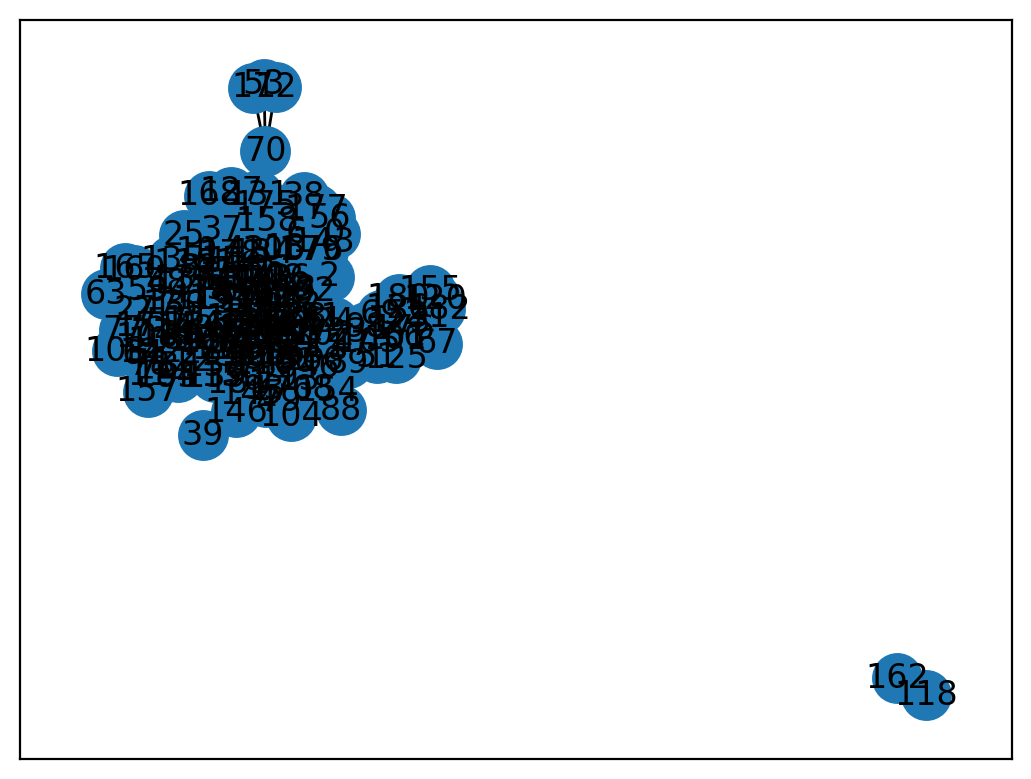

In [29]:
plt.figure(dpi=200)
nx.draw_networkx(G)

In [30]:
for j in G.edges.data():
    if j[0] in [162,118] or j[1] in [118,162]:
        print(j)

(118, 162, {})


In [31]:
# G.remove_edge(196,259)
G.remove_node(162)
G.remove_node(118)

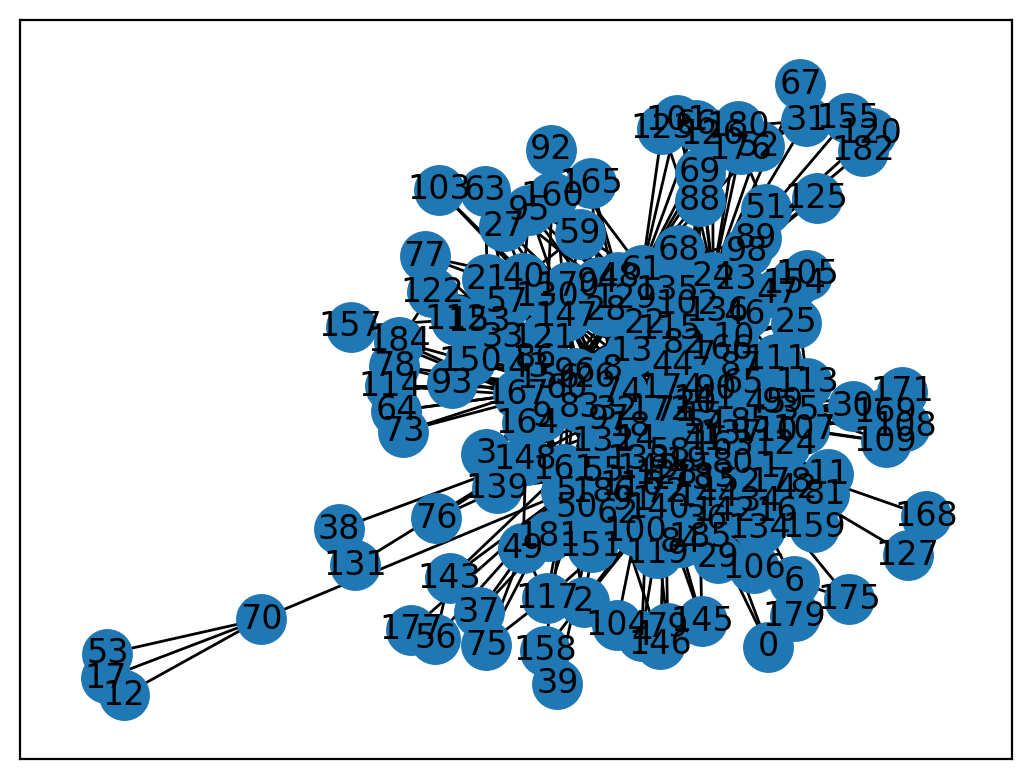

In [32]:
plt.figure(dpi=200)
nx.draw_networkx(G)

In [33]:
lista_degree = dict(G.degree)

In [34]:
maiores_nos =  sorted(dict(G.degree()).items(), key = lambda x: x[1], reverse=True)[:30]
trinta_maiores_nos = {}
for i in maiores_nos:
    trinta_maiores_nos[str(i[0]) + "-" + lista_personagem_final[i[0]]] = i[1]

trinta_maiores_nos

{'172-TYRION LANNISTER': 69,
 '54-JAIME LANNISTER': 52,
 '60-JON SNOW': 51,
 '149-SANSA STARK': 46,
 '5-ARYA STARK': 43,
 '20-CERSEI LANNISTER': 43,
 '24-DAENERYS TARGARYEN': 40,
 '15-BRONN': 39,
 '72-LITTLEFINGER': 37,
 '163-THEON GREYJOY': 36,
 '13-BRAN STARK': 35,
 '19-CATELYN STARK': 34,
 '32-EDDARD STARK': 34,
 '147-SAMWELL TARLY': 32,
 '26-DAVOS SEAWORTH': 30,
 '14-BRIENNE DE TARTH': 28,
 '58-JOFFREY BARATHEON': 27,
 '174-VARYS': 27,
 '61-JORAH MORMONT': 26,
 '41-GRANDE MEISTRE PYCELLE': 23,
 '137-ROBB STARK': 23,
 '167-TORMUND': 21,
 '96-MELISANDRE': 18,
 '40-GILLY': 17,
 '44-GREY WORM': 17,
 '55-JANOS SLYNT': 17,
 '173-TYWIN LANNISTER': 17,
 '7-BARRISTAN SELMY': 16,
 '35-ELLARIA SAND': 16,
 '71-LANCEL LANNISTER': 16}

In [35]:
# Diâmetro - comprimento do caminho mais longo entre quaisquer dois vértices no grafo
print(nx.diameter(G))

5


In [36]:
# O coeficiente de clustering médio é uma medida estatística que indica a tendência dos vértices em um grafo de formar agrupamentos densos de conexões entre s
print(nx.average_clustering(G))

0.6049730369140497


In [37]:
r_grau = nx.degree_assortativity_coefficient(G)
r_grau

-0.12656533165313105

## testando com conexão com peso

In [51]:
G_simples = recarregar_grafo()

In [52]:
G_simples.nodes.data()

NodeDataView({0: {'nome': 'AERON GREYJOY', 'fala': 10}, 1: {'nome': 'ALTON LANNISTER', 'fala': 34}, 2: {'nome': 'AMORY LORCH', 'fala': 14}, 3: {'nome': 'ANGUY', 'fala': 30}, 4: {'nome': 'ANYA WAYNWOOD', 'fala': 14}, 5: {'nome': 'ARYA STARK', 'fala': 803}, 6: {'nome': 'BALON GREYJOY', 'fala': 48}, 7: {'nome': 'BARRISTAN SELMY', 'fala': 105}, 8: {'nome': 'BENJEN STARK', 'fala': 37}, 9: {'nome': 'BERIC DONDARRION', 'fala': 105}, 10: {'nome': 'BLACK LORREN', 'fala': 10}, 11: {'nome': 'BLACK WALDER', 'fala': 17}, 12: {'nome': 'BOBONO', 'fala': 14}, 13: {'nome': 'BRAN STARK', 'fala': 408}, 14: {'nome': 'BRIENNE DE TARTH', 'fala': 399}, 15: {'nome': 'BRONN', 'fala': 402}, 16: {'nome': 'BRYNDEN TULLY', 'fala': 55}, 17: {'nome': 'CAMELLO', 'fala': 17}, 18: {'nome': 'CAPTAIN', 'fala': 16}, 19: {'nome': 'CATELYN STARK', 'fala': 302}, 20: {'nome': 'CERSEI LANNISTER', 'fala': 1029}, 21: {'nome': 'CRASTER', 'fala': 35}, 22: {'nome': 'CROWD', 'fala': 19}, 23: {'nome': 'DAARIO NAHARIS', 'fala': 166}, 

In [53]:
edges_simples = {}
for i in range(df['cena'].max()):
    pers = []
    for p in df[df['cena']==i]['personagem_padronizado'].str.upper():
        pers.append(p) if p in lista_personagem_final else None

    if len(pers) > 0:
        for x in pers:
            for y in pers:
                if x != y:
                    c = '{}, {}'.format(lista_personagem_final.index(x),lista_personagem_final.index(y))
                    edges_simples[c] = edges_simples.get(c,0) + 1

print(len(edges_simples))

1898


In [54]:
edges_peso = []
for i in edges_simples:
    edges_peso.append((int(i.split(',')[0].strip()),int(i.split(',')[1].strip()),{'peso':edges_simples[i]}))
edges_peso

[(149, 151, {'peso': 212}),
 (151, 149, {'peso': 212}),
 (32, 60, {'peso': 53}),
 (32, 137, {'peso': 1}),
 (60, 32, {'peso': 53}),
 (60, 137, {'peso': 20}),
 (137, 32, {'peso': 1}),
 (137, 60, {'peso': 20}),
 (19, 32, {'peso': 88}),
 (19, 141, {'peso': 47}),
 (32, 19, {'peso': 88}),
 (32, 141, {'peso': 4}),
 (141, 19, {'peso': 47}),
 (141, 32, {'peso': 4}),
 (32, 13, {'peso': 26}),
 (13, 32, {'peso': 26}),
 (60, 163, {'peso': 75}),
 (163, 60, {'peso': 75}),
 (163, 32, {'peso': 6}),
 (32, 163, {'peso': 6}),
 (60, 13, {'peso': 13}),
 (60, 141, {'peso': 2}),
 (13, 60, {'peso': 13}),
 (13, 141, {'peso': 18}),
 (13, 163, {'peso': 114}),
 (141, 60, {'peso': 2}),
 (141, 13, {'peso': 18}),
 (141, 163, {'peso': 40}),
 (163, 13, {'peso': 114}),
 (163, 141, {'peso': 40}),
 (54, 20, {'peso': 1008}),
 (20, 54, {'peso': 1008}),
 (19, 87, {'peso': 37}),
 (19, 82, {'peso': 15}),
 (87, 19, {'peso': 37}),
 (87, 82, {'peso': 1}),
 (82, 19, {'peso': 15}),
 (82, 87, {'peso': 1}),
 (163, 137, {'peso': 123})

In [55]:
G_simples.add_edges_from(edges_peso)
print(G_simples)

Graph with 187 nodes and 949 edges


In [56]:
# removendo personagens que não possuem conexão
rmv = []
for i in G_simples.nodes():
    verif = False
    for j in G_simples.edges.data():
        if j[0] == i or j[1] == i:
            verif = True
    if not verif: rmv.append(i)
print(len(rmv))
for x in rmv: G_simples.remove_node(x)

1


In [57]:
print(G_simples.edges.data())

[(0, 183, {'peso': 6}), (0, 36, {'peso': 1}), (1, 137, {'peso': 30}), (1, 141, {'peso': 2}), (1, 20, {'peso': 5}), (1, 172, {'peso': 3}), (1, 134, {'peso': 9}), (1, 142, {'peso': 3}), (1, 54, {'peso': 468}), (2, 186, {'peso': 4}), (2, 173, {'peso': 8}), (2, 5, {'peso': 20}), (3, 164, {'peso': 25}), (3, 5, {'peso': 36}), (3, 161, {'peso': 29}), (3, 9, {'peso': 29}), (3, 96, {'peso': 5}), (3, 97, {'peso': 3}), (4, 72, {'peso': 77}), (4, 79, {'peso': 69}), (4, 149, {'peso': 30}), (5, 149, {'peso': 576}), (5, 138, {'peso': 77}), (5, 32, {'peso': 334}), (5, 19, {'peso': 1}), (5, 20, {'peso': 89}), (5, 60, {'peso': 152}), (5, 58, {'peso': 36}), (5, 151, {'peso': 17}), (5, 158, {'peso': 49}), (5, 72, {'peso': 9}), (5, 62, {'peso': 6}), (5, 186, {'peso': 29}), (5, 100, {'peso': 2}), (5, 49, {'peso': 156}), (5, 75, {'peso': 17}), (5, 56, {'peso': 305}), (5, 143, {'peso': 16}), (5, 117, {'peso': 7}), (5, 173, {'peso': 184}), (5, 164, {'peso': 123}), (5, 161, {'peso': 232}), (5, 9, {'peso': 79}),

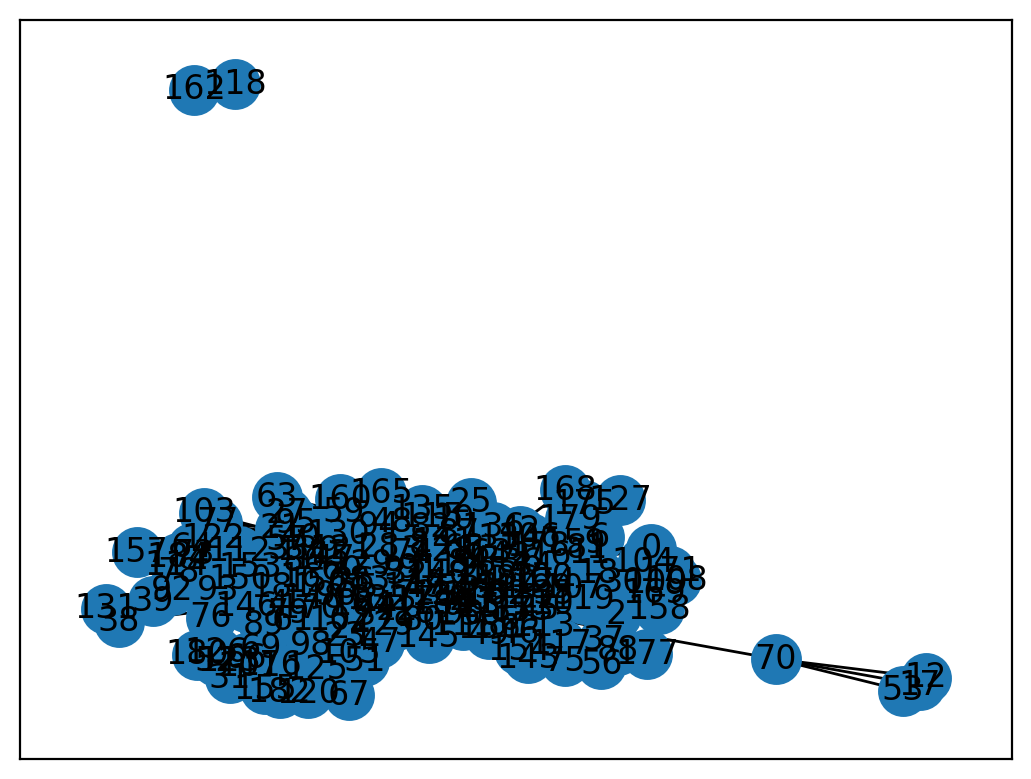

In [58]:
plt.figure(dpi=200)
nx.draw_networkx(G_simples)

In [59]:
G_simples.remove_node(118)
G_simples.remove_node(162)
G_simples.remove_node(53)
G_simples.remove_node(12)
G_simples.remove_node(17)

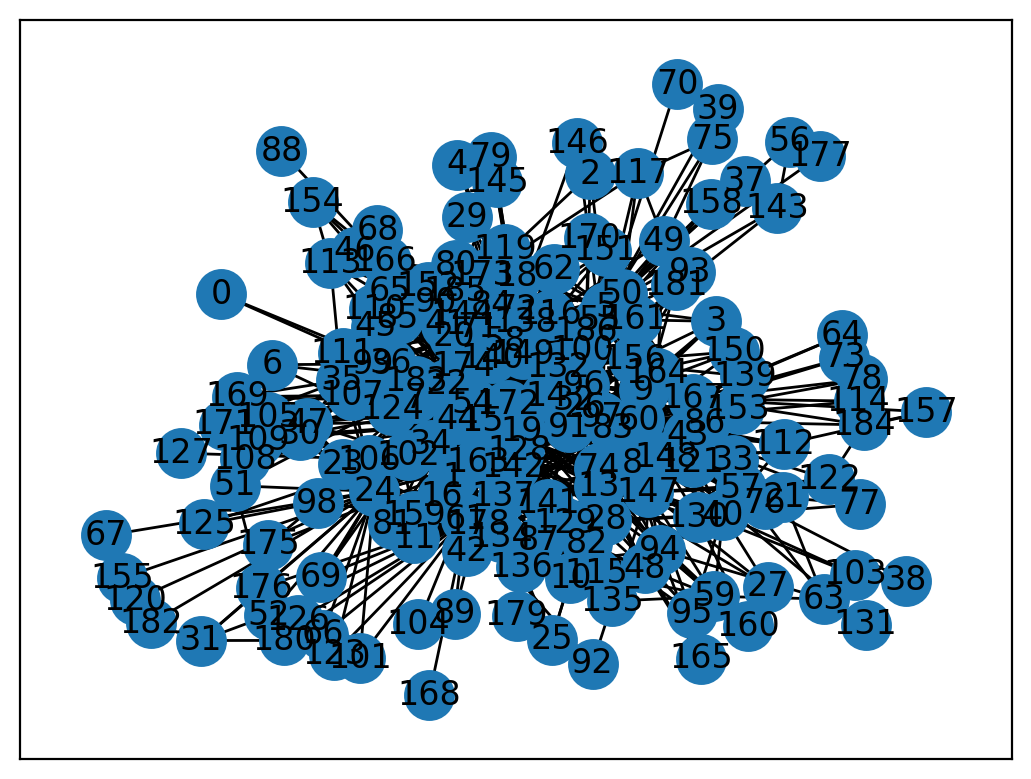

In [60]:
plt.figure(dpi=200)
nx.draw_networkx(G_simples)

In [61]:
lista = dict(G_simples.degree)

{'AERON GREYJOY': 2, 'ALTON LANNISTER': 7, 'AMORY LORCH': 3, 'ANGUY': 6, 'ANYA WAYNWOOD': 3, 'ARYA STARK': 43, 'BALON GREYJOY': 3, 'BARRISTAN SELMY': 16, 'BENJEN STARK': 7, 'BERIC DONDARRION': 13, 'BLACK LORREN': 6, 'BLACK WALDER': 7, 'BRAN STARK': 35, 'BRIENNE DE TARTH': 28, 'BRONN': 39, 'BRYNDEN TULLY': 9, 'CAPTAIN': 3, 'CATELYN STARK': 34, 'CERSEI LANNISTER': 43, 'CRASTER': 7, 'CROWD': 8, 'DAARIO NAHARIS': 9, 'DAENERYS TARGARYEN': 40, 'DAGMER CLEFTJAW': 3, 'DAVOS SEAWORTH': 30, 'DERRICK DARRY': 3, 'DICKON TARLY': 7, 'DONTOS HOLLARD': 4, 'DORAN': 5, 'DOREAH': 5, 'EDDARD STARK': 34, 'EDDISON TOLLETT': 9, 'EDMURE TULLY': 10, 'ELLARIA SAND': 16, 'EURON GREYJOY': 8, 'FARMER HAMLET': 2, 'GATINS': 1, 'GENDRY BARATHEON': 1, 'GILLY': 17, 'GRANDE MEISTRE PYCELLE': 23, 'GREATJON UMBER': 6, 'GRENN': 11, 'GREY WORM': 17, 'HIGH SEPTON': 9, 'HIGH SPARROW': 6, 'HIZDAHR ZO LORAQ': 6, 'HODOR': 10, 'HOT PIE': 6, 'HOUND': 11, 'ILLYRIO MOPATIS': 3, 'IRRI': 5, 'JAIME LANNISTER': 52, 'JANOS SLYNT': 17, 'J

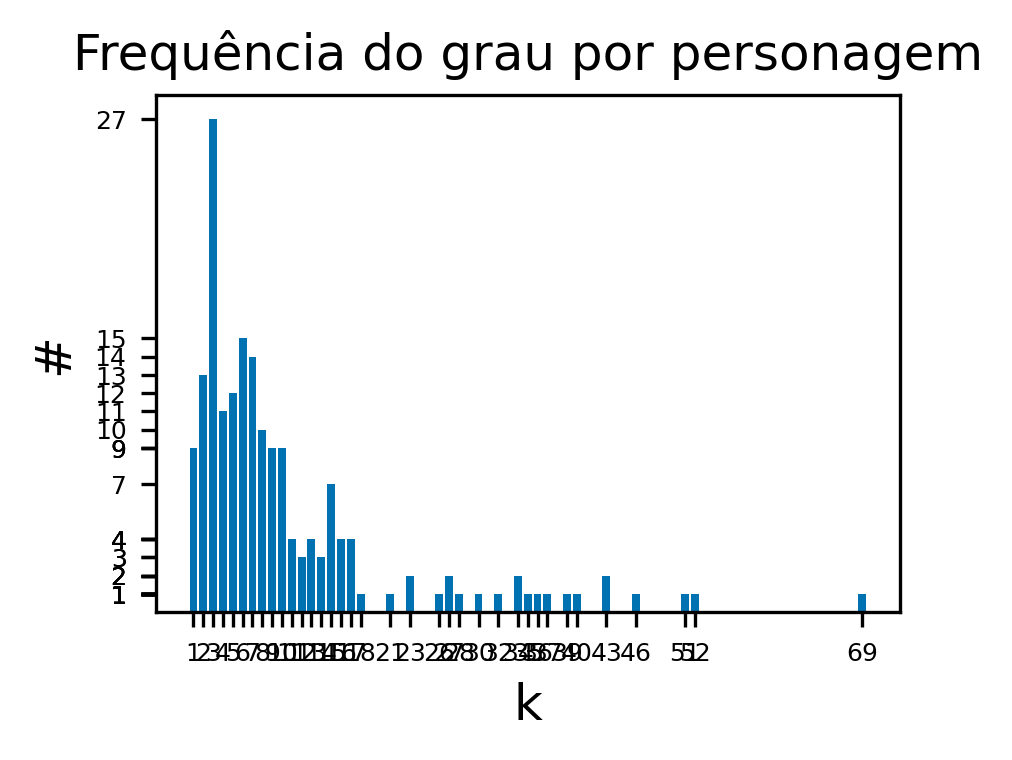

In [65]:
list_of_degrees = list(dict(G_simples.degree).values())
counter = Counter(list_of_degrees)
print({lista_personagem_final[x]: lista[x] for x in lista})


x = list(counter.keys())
y = list(counter.values())

def plot_bar(x,y):
    figx = 3.2
    figy = (7/10)*figx
    fig, ax = plt.subplots(figsize=(figx,figy),dpi=300)
    myplot = ax.bar(x,
                    y,
                    color = '#0072B2',
                    align = 'center')

    ax.set_xlabel('k',fontsize='12')
    ax.set_ylabel('#',fontsize='12')

    ax.set_xticks(x)
    ax.set_yticks(y)

    ax.set_xticklabels(x,fontsize='6')
    ax.set_yticklabels(y,fontsize='6')
    
    ax.set_title('Frequência do grau por personagem')

plot_bar(x,y)

In [ ]:
G_simples.edges()

In [102]:
maiores_nos =  sorted(dict(G_simples.degree()).items(), key = lambda x: x[1], reverse=True)[:20]
vinte_maiores_nos = {}
for i in maiores_nos:
    vinte_maiores_nos[str(i[0]) + "-" + lista_personagem_final[i[0]]] = i[1]

vinte_maiores_nos

{'172-TYRION LANNISTER': 69,
 '54-JAIME LANNISTER': 52,
 '60-JON SNOW': 51,
 '149-SANSA STARK': 46,
 '5-ARYA STARK': 43,
 '20-CERSEI LANNISTER': 43,
 '24-DAENERYS TARGARYEN': 40,
 '15-BRONN': 39,
 '72-LITTLEFINGER': 37,
 '163-THEON GREYJOY': 36,
 '13-BRAN STARK': 35,
 '19-CATELYN STARK': 34,
 '32-EDDARD STARK': 34,
 '147-SAMWELL TARLY': 32,
 '26-DAVOS SEAWORTH': 30,
 '14-BRIENNE DE TARTH': 28,
 '58-JOFFREY BARATHEON': 27,
 '174-VARYS': 27,
 '61-JORAH MORMONT': 26,
 '41-GRANDE MEISTRE PYCELLE': 23}

{0: 0.006552509429807896, 1: 0.04866573088376358, 2: 0.016444751717180274, 3: 0.025183598126318516, 4: 0.02047283561287894, 5: 0.18780568180534526, 6: 0.014005061251360789, 7: 0.0790012348331505, 8: 0.05104203039411892, 9: 0.0657970383767589, 10: 0.0250902486075821, 11: 0.03069883875821485, 13: 0.17498231744022993, 14: 0.16524974004591825, 15: 0.15332814418192506, 16: 0.042527130552728706, 18: 0.027282959474927048, 19: 0.1797597285016362, 20: 0.20953661723724906, 21: 0.026459191439317485, 22: 0.04794373867509246, 23: 0.04035217953693478, 24: 0.14847928560566773, 25: 0.016877564606896604, 26: 0.15626595253601047, 27: 0.016246267021780943, 28: 0.043009483407812625, 29: 0.03681442100998659, 30: 0.025275243315415214, 31: 0.009229117119573775, 32: 0.18049901892660977, 33: 0.04152090995826945, 34: 0.05722667453936846, 35: 0.07465599773993128, 36: 0.057214739883590424, 37: 0.011921097316470548, 38: 0.004049929913876232, 39: 0.004844818359483103, 40: 0.04988992793520804, 41: 0.1293706380439845

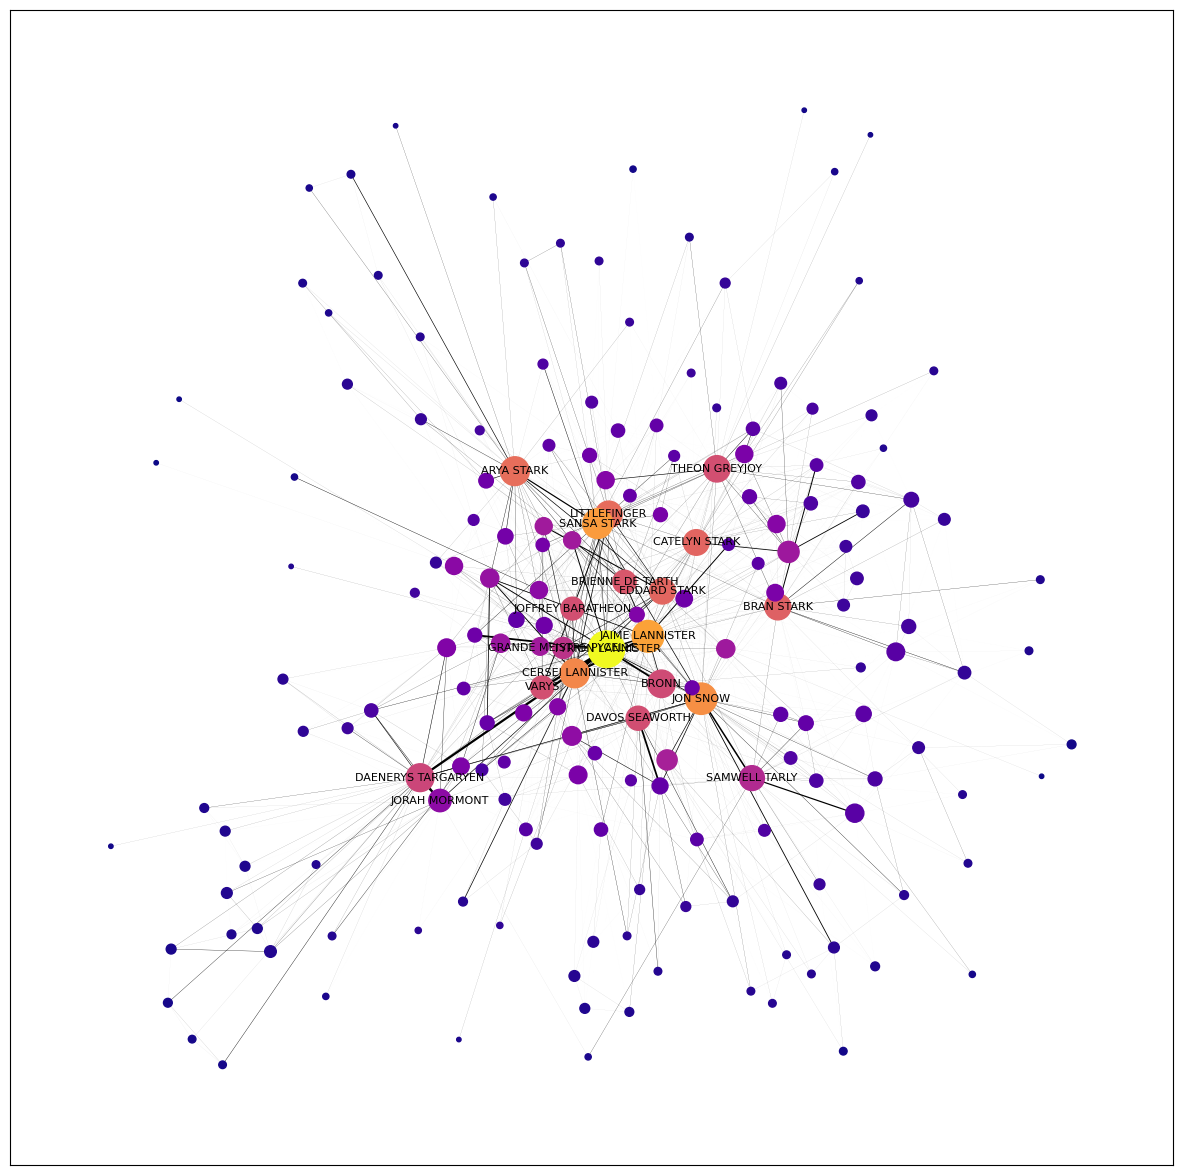

In [109]:
eigenvector_centrality = nx.eigenvector_centrality(G_simples)

labels = {x[0]: lista_personagem_final[x[0]] for x in maiores_nos}

peso_edge = [G_simples[u][v]['peso']*0.0015 for u,v in G_simples.edges()]
peso_nos = [lista[x]*10 for x in lista]

def plot_network(G,x):
    fig,ax = plt.subplots(figsize=(15,15))
    pos = nx.spring_layout(G_simples,
                           seed=42)

    nx.draw_networkx(G_simples,
                     pos,
                     with_labels=True,
                     cmap=plt.cm.plasma,
                     font_size=8,
                     node_size = peso_nos,
                     width = peso_edge,
                     labels = labels,
                     node_color=list(x.values()),
                     nodelist=x.keys())

plot_network(G_simples, eigenvector_centrality)

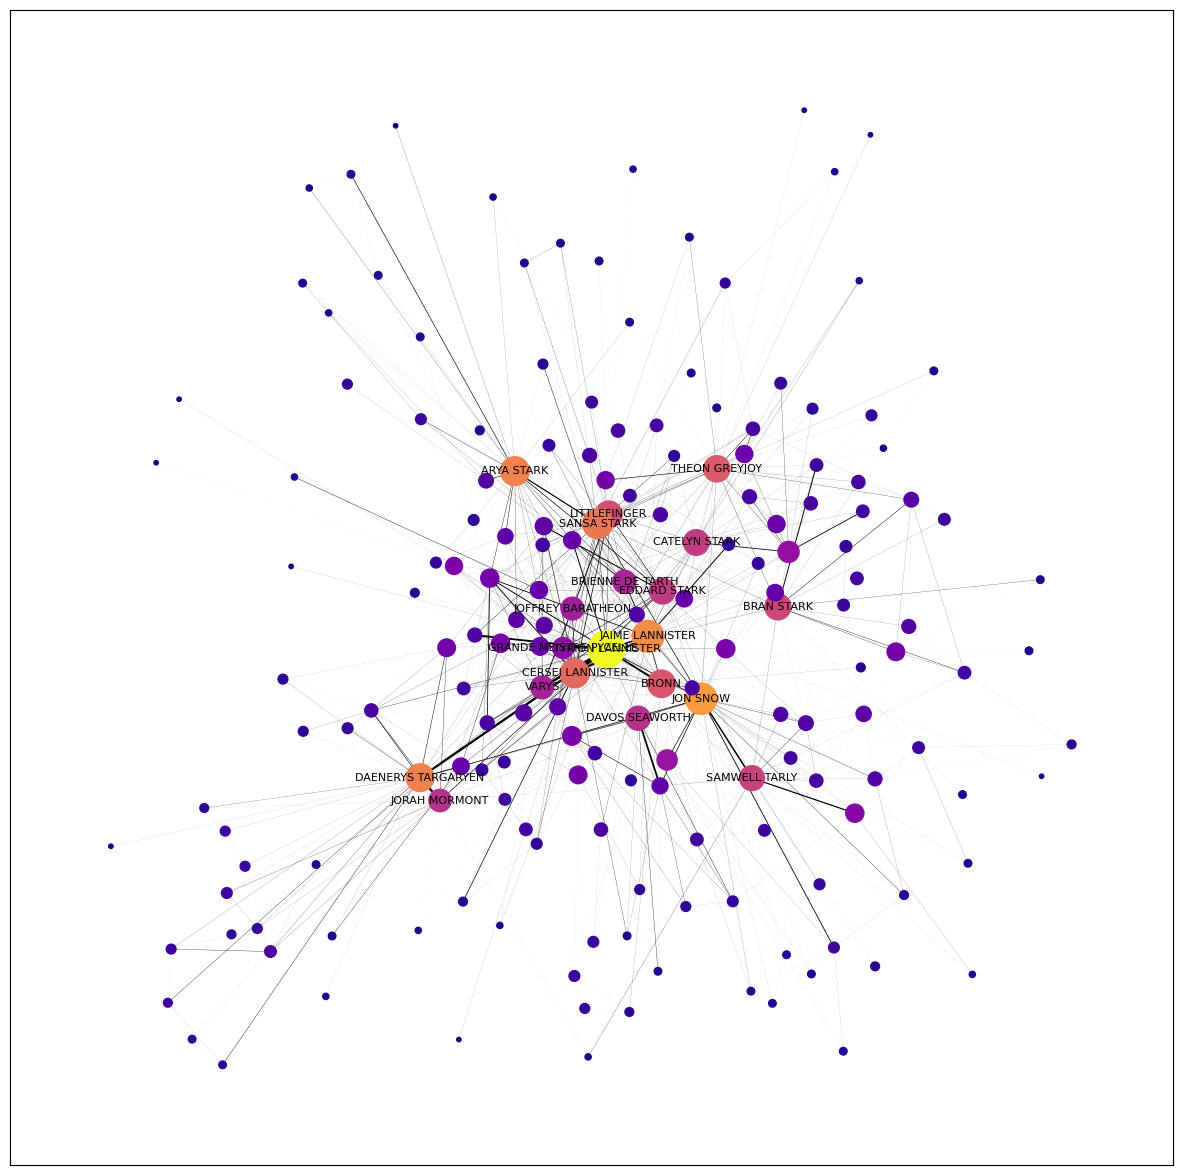

In [110]:
pagerank = nx.pagerank(G_simples)

labels = {x[0]: lista_personagem_final[x[0]] for x in maiores_nos}

peso_edge = [G_simples[u][v]['peso']*0.0015 for u,v in G_simples.edges()]
peso_nos = [lista[x]*10 for x in lista]

def plot_network(G,x):
    fig,ax = plt.subplots(figsize=(15,15))
    pos = nx.spring_layout(G_simples,
                           seed=42)

    nx.draw_networkx(G_simples,
                     pos,
                     with_labels=True,
                     cmap=plt.cm.plasma,
                     font_size=8,
                     node_size = peso_nos,
                     width = peso_edge,
                     labels = labels,
                     node_color=list(x.values()),
                     nodelist=x.keys())

plot_network(G_simples,pagerank)

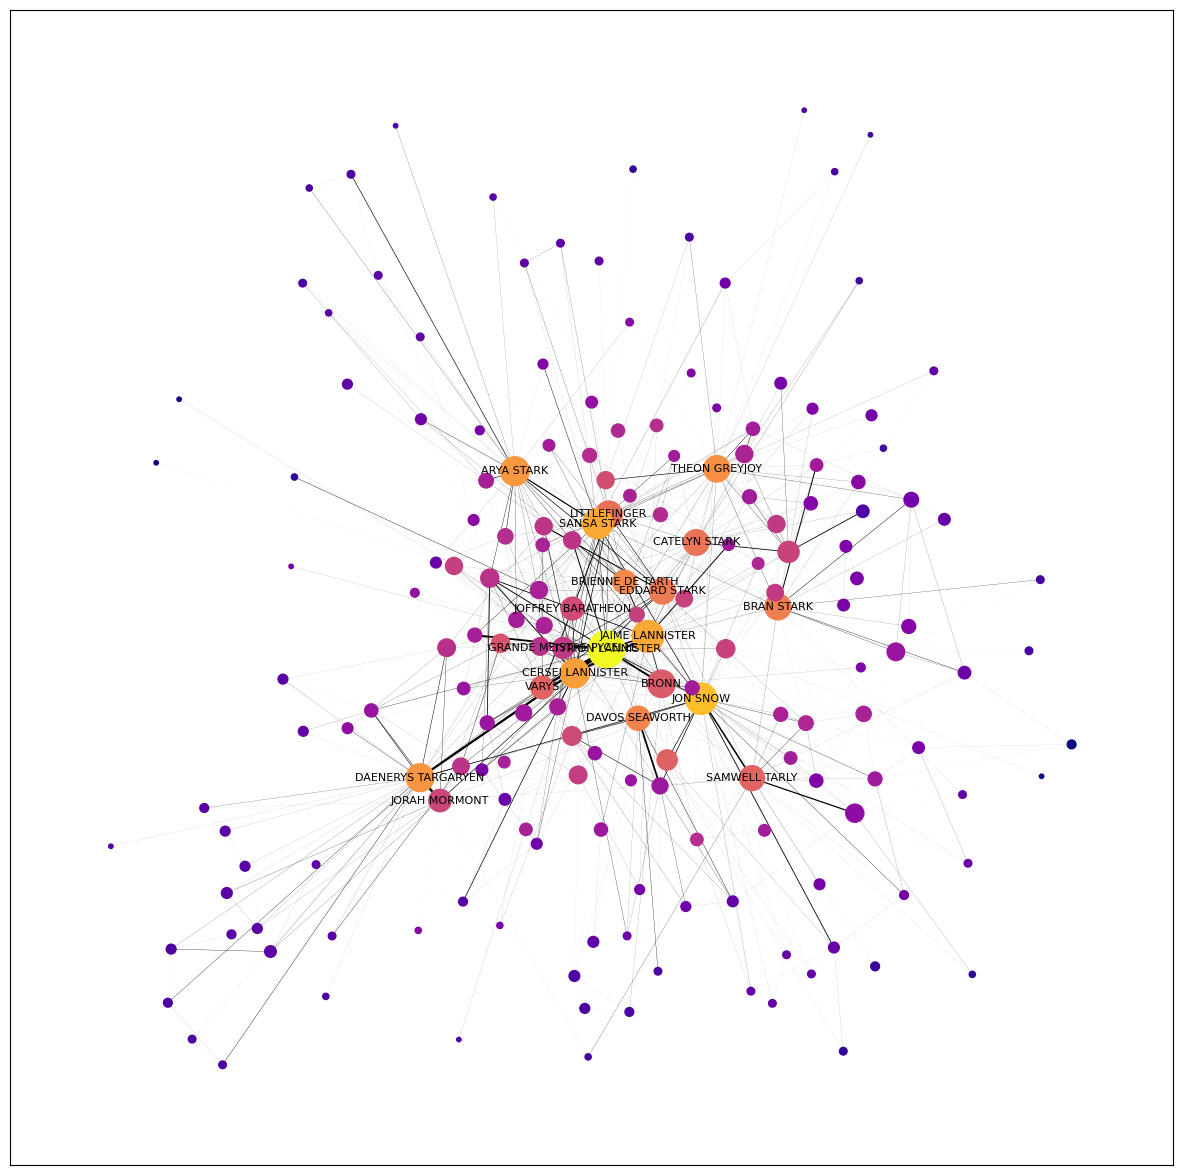

In [111]:
closeness_centrality = nx.closeness_centrality(G_simples)

labels = {x[0]: lista_personagem_final[x[0]] for x in maiores_nos}

peso_edge = [G_simples[u][v]['peso']*0.0015 for u,v in G_simples.edges()]
peso_nos = [lista[x]*10 for x in lista]

def plot_network(G,x):
    fig,ax = plt.subplots(figsize=(15,15))
    pos = nx.spring_layout(G_simples,
                           seed=42)

    nx.draw_networkx(G_simples,
                     pos,
                     with_labels=True,
                     cmap=plt.cm.plasma,
                     font_size=8,
                     node_size = peso_nos,
                     width = peso_edge,
                     labels = labels,
                     node_color=list(x.values()),
                     nodelist=x.keys())
    
plot_network(G_simples,closeness_centrality)